In [15]:
#import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing Dataset
dataset = pd.read_csv(r'C:\Users\Aman\Desktop\ML_assignment_1\abalone.data')
dataset.columns=["Sex","Length","Diameter","Height","Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

# Adjusting sex column
male=[]
female=[]
infant=[]
for i in range(len(dataset)):
    if(dataset.loc[i,"Sex"]=="M"):
        male.append(1)
        female.append(0)
        infant.append(0)
    if(dataset.loc[i,"Sex"]=="F"):
        male.append(0)
        female.append(1)
        infant.append(0)
    if(dataset.loc[i,"Sex"]=="I"):
        male.append(0)
        female.append(0)
        infant.append(1)
dataset=dataset.drop("Sex",axis='columns')
# dataset.insert(2,"Infant",infant)
# dataset

    

In [16]:
def feature_normalize(X):
    #calculating the mean
    mu = np.mean(X, axis = 0)  
    
    #calculating the standard deviation
    sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
    
    #Normalising the dataset
    X_norm = (X - mu)/sigma
    
    #Un-normalising the output column, because we should not normalize output in regression
    X_norm = X_norm.drop('Rings',axis='columns')
    X_norm.insert(len(X_norm.loc[0]),"Rings",X.loc[:,"Rings"])
    return X_norm

dataset=feature_normalize(dataset)
#Adding dummy variables for gender
dataset.insert(0,"Male",male)
dataset.insert(1,"Female",female)
#inserting a constant array for Θ₀
dataset.insert(len(dataset.iloc[0]),"constant",np.ones(len(dataset)))
# dataset

,Male,Female,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,constant
0,1,0,-1.448834,-1.439720,-1.184110,-1.230197,-1.170827,-1.205183,-1.212909,7,1.0
1,0,1,0.049886,0.122000,-0.108235,-0.309564,-0.463555,-0.356801,-0.207252,9,1.0
2,1,0,-0.699474,-0.432158,-0.347318,-0.637852,-0.648256,-0.607666,-0.602332,10,1.0
3,0,0,-1.615358,-1.540476,-1.423194,-1.271998,-1.215876,-1.287284,-1.320658,7,1.0
4,0,0,-0.824367,-1.087073,-1.064569,-0.973276,-0.983873,-0.940633,-0.853746,8,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4171,0,1,0.341303,0.424269,0.609016,0.118637,0.047753,0.532632,0.072895,11,1.0
4172,1,0,0.549459,0.323513,-0.108235,0.279722,0.358592,0.309133,0.155502,10,1.0
4173,1,0,0.632721,0.676159,1.565350,0.707924,0.748268,0.975067,0.496707,9,1.0
4174,0,1,0.840876,0.776915,0.250391,0.541741,0.773045,0.733324,0.410508,10,1.0


In [19]:
# Splitting data into test/train and x/y
X_train=dataset.sample(frac = 0.8)
X_test = dataset.drop(X_train.index)
Y_train=X_train['Rings']
Y_test=X_test['Rings']
X_train=X_train.drop('Rings',axis='columns')
X_test=X_test.drop('Rings',axis='columns')
print('X_train.shape',X_train.shape)
print('X_test.shape',X_test.shape)
print('Y_train.shape',Y_train.shape)
print('Y_test.shape',Y_test.shape)
# X_train

X_train.shape (3341, 10)
X_test.shape (835, 10)
Y_train.shape (3341,)
Y_test.shape (835,)


Male              1.541711
Female            1.673204
Length            0.237203
Diameter          0.638704
Height            0.450793
Whole weight      0.505867
Shucked weight   -2.330581
Viscera weight   -0.518571
Shell weight      2.482455
constant          8.821914
dtype: float64


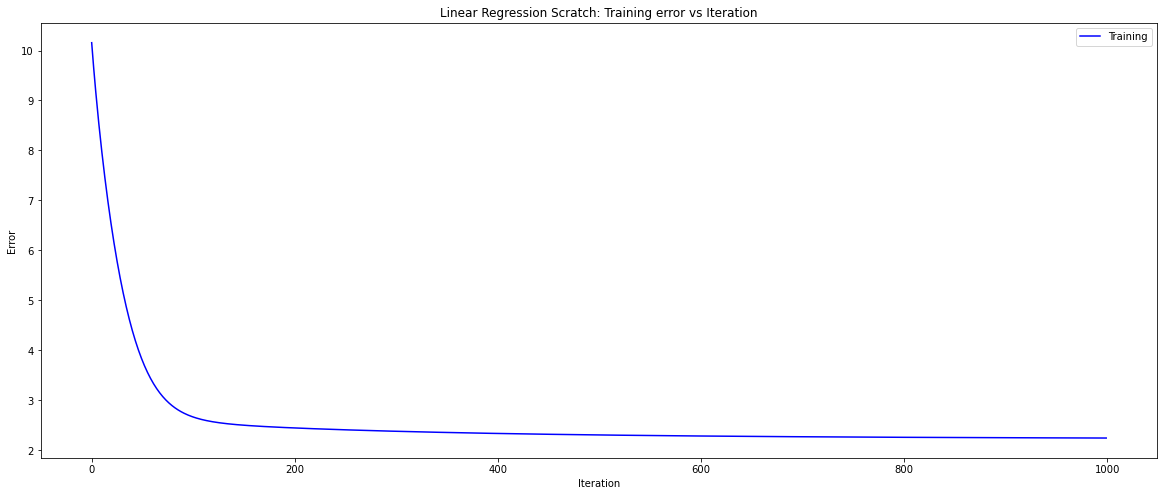

In [20]:
def compute_cost(x, y, theta):
    #Function to calculate RMSE
    m=len(x)
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = (1 / (m) * np.sum(sqrErrors))**0.5
    return J
def gradient_descent(x_train, y_train, weights, alpha, epochs):
    train_cost_history = np.zeros(epochs)
    test_cost_history = np.zeros(epochs)
    m=len(x_train)
    for i in range(epochs):
        #Calculating predictons
        predictions=np.dot(x_train,weights)
        
        #Calculating error
        errors = np.subtract(predictions, y_train)
        
        #Updating weights
        sum_delta = (2*alpha / m) * x_train.transpose().dot(errors);
        weights=weights-sum_delta
        
        train_cost_history[i]=compute_cost(x_train, y_train, weights)
    return weights, predictions, train_cost_history

weights=np.zeros(len(X_train.iloc[0]))
weights[0]=0

weights,train_predictions,training_error_history=gradient_descent(X_train,Y_train,weights,0.01,1000)
print(weights)
#Saving weights
np.savetxt('weightsQ1_1.csv' , weights , fmt='%s', delimiter=',')

#Plotting loss graph
plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(training_error_history)), training_error_history,color='blue', label="Training")
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Linear Regression Scratch: Training error vs Iteration')
plt.legend(loc='best')
plt.show()

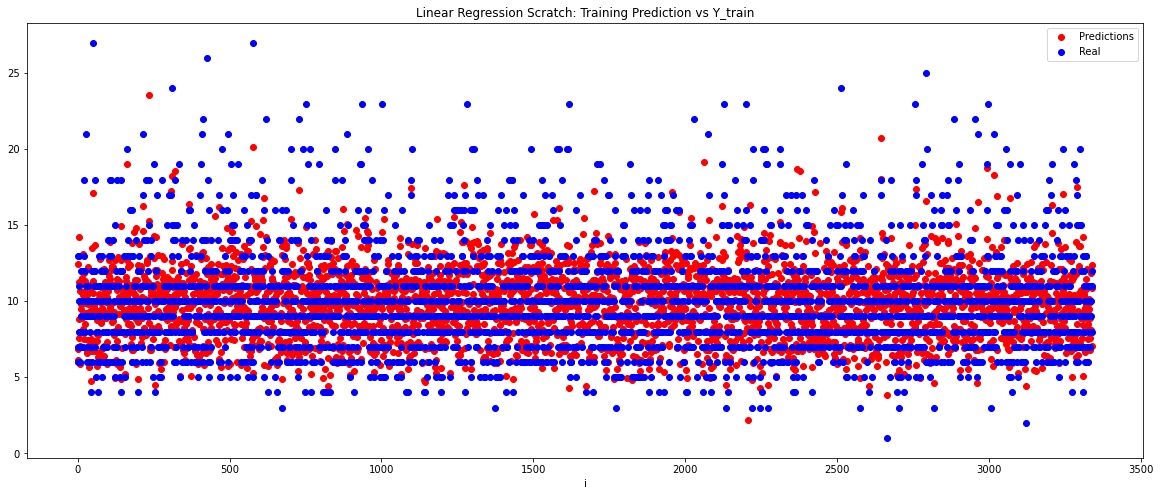

In [21]:
plt.figure(figsize=(20, 8))
plt.scatter(np.arange(len(train_predictions)), train_predictions, color='red', label='Predictions')
plt.scatter(np.arange(len(train_predictions)), Y_train, color='blue', label= 'Real')
plt.legend(loc='best')
plt.xlabel('i')
plt.title('Linear Regression Scratch: Training Prediction vs Y_train')
# function to show the plot
plt.show()

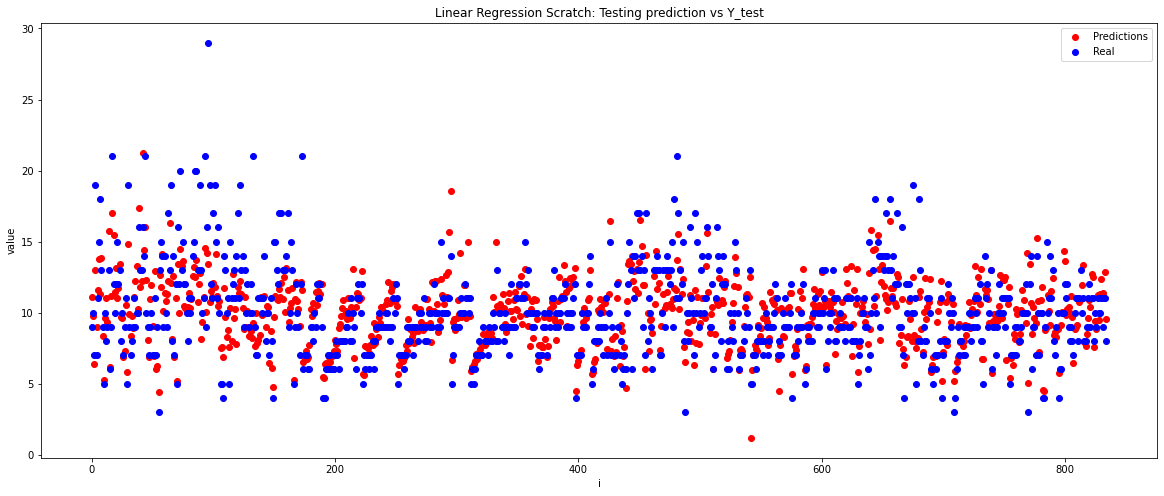

In [22]:
test_predictions=X_test.dot(weights)
plt.figure(figsize=(20, 8))
plt.scatter(np.arange(len(test_predictions)), test_predictions, color='red', label='Predictions')
plt.scatter(np.arange(len(test_predictions)), Y_test, color='blue', label='Real')
plt.legend(loc='best')
plt.ylabel('value')
plt.xlabel('i')
plt.title('Linear Regression Scratch: Testing prediction vs Y_test')
# plt.xticks([50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900])
# function to show the plot
plt.show()

In [23]:
print('Linear Regression Scratch:')
print("Training RMSE =",training_error_history[-1])
print("Testing RMSE =",compute_cost(X_test, Y_test, weights))

Linear Regression Scratch:
Training RMSE = 2.2445383772298912
Testing RMSE = 2.2332375830382363


Male              1.909358
Female            1.834658
Length            0.218861
Diameter          0.284730
Height            0.375243
Whole weight      0.146722
Shucked weight   -0.368810
Viscera weight   -0.017612
Shell weight      0.654908
constant          5.771177
dtype: float64


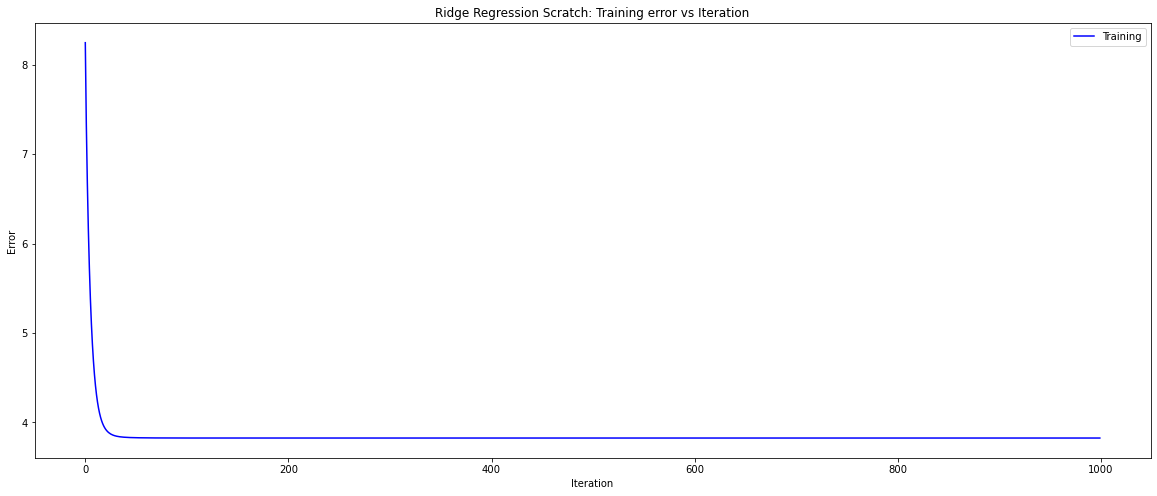

In [24]:
def ridge_regression(x_train, y_train, weights, alpha, epochs, l2_penalty):
    train_cost_history = np.zeros(epochs)
    test_cost_history = np.zeros(epochs)
    m=len(x_train)
    for i in range(epochs):
#         temp=weights.to_numpy()
#         temp=temp[0]
#         temp=temp[1:]
        
        predictions=np.dot(x_train,weights)
        errors = np.subtract(predictions, y_train)
        sum_delta = (2*alpha / m) * x_train.transpose().dot(errors);
        weights=((1-(2*alpha*l2_penalty))*weights)-sum_delta
        train_cost_history[i]=compute_cost(x_train, y_train, weights)
    return weights, predictions, train_cost_history
weights=np.ones(len(X_train.iloc[0]))
weights[0]=0
weights,train_predictions, training_error_history=ridge_regression(X_train,Y_train,weights,0.05,1000,0.5)
print(weights)

plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(training_error_history)), training_error_history,color='blue', label="Training")
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Ridge Regression Scratch: Training error vs Iteration')
plt.legend(loc='best')
plt.show()

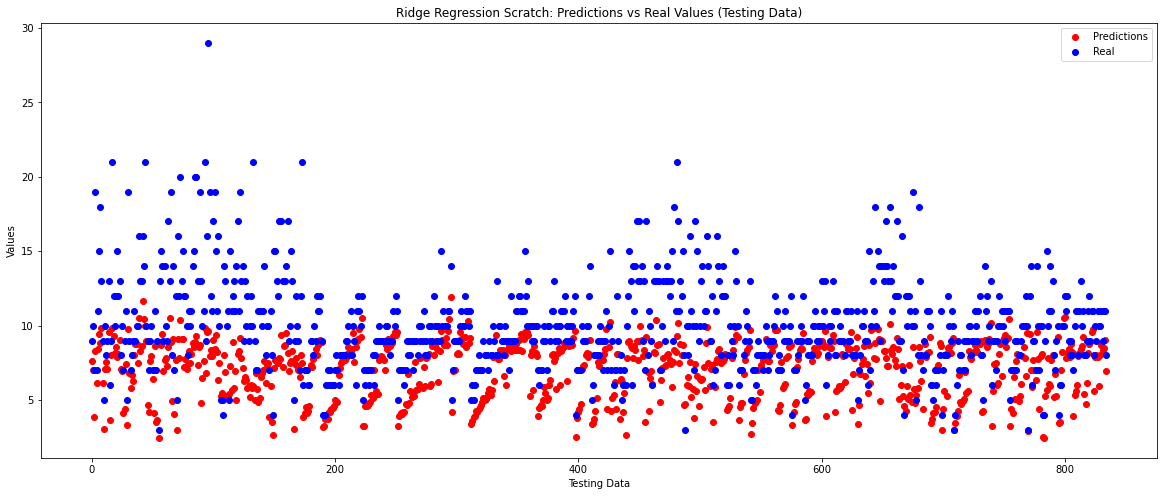

In [25]:
test_predictions=X_test.dot(weights)
plt.figure(figsize=(20, 8))
plt.scatter(np.arange(len(test_predictions)), test_predictions, color='red', label='Predictions')
plt.scatter(np.arange(len(test_predictions)), Y_test, color='blue', label='Real')
plt.title('Ridge Regression Scratch: Predictions vs Real Values (Testing Data)')
plt.xlabel('Testing Data')
plt.ylabel('Values')
plt.legend(loc='best')
plt.show()

In [26]:
print('Ridge Regression Scratch:')
print("Training RMSE =",training_error_history[-1])
print("Testing RMSE =",compute_cost(X_test, Y_test, weights))

Ridge Regression Scratch:
Training RMSE = 3.8251135282609594
Testing RMSE = 3.793816833745789


In [27]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
dataset=dataset.drop("constant",axis="columns")
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop("Rings",axis='columns'), dataset["Rings"], test_size=0.20, random_state=0)
# print(X_train.shape)
# print(X_test.shape)
# X_train

for alpha = 0.0001 , RMSE = 2.16398480447375
for alpha = 0.001 , RMSE = 2.159993170035247
for alpha = 0.01 , RMSE = 2.152385901071278
for alpha = 0.1 , RMSE = 2.1923862721501917
for alpha = 0.5 , RMSE = 2.33060045906286
for alpha = 1 , RMSE = 2.3932428111504453
for alpha = 2 , RMSE = 2.4548402911252523
for alpha = 3 , RMSE = 2.497954790186334
for alpha = 4 , RMSE = 2.5348249700253738
for alpha = 5 , RMSE = 2.56764748800138


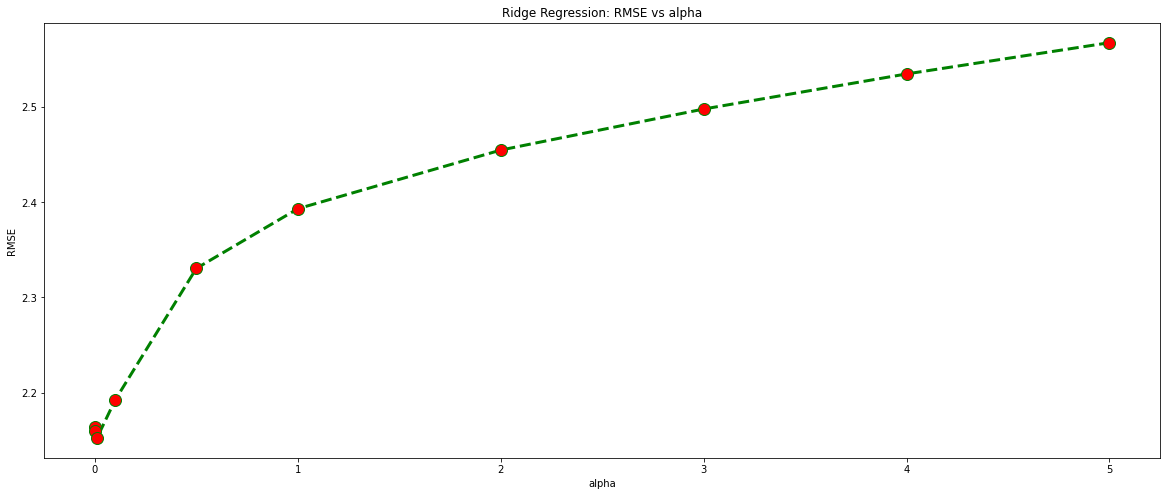

Best value of alpha is 0.01 That gives error = 2.152385901071278


In [28]:
alpha_list=[0.0001,0.001,0.01,0.1,0.5,1,2,3,4,5]
rmse_list=[]
plt.figure(figsize=(20, 8))
for i in alpha_list:
    #Performing ridge on each alpha
    ridgeReg = Ridge(alpha=i, normalize=True)
    ridgeReg.fit(X_train,Y_train)
    pred = ridgeReg.predict(X_test)
    rmse= np.sqrt(mean_squared_error(Y_test,pred))
    print('for alpha =',i,', RMSE =',rmse)
    rmse_list.append(rmse)

plt.title('Ridge Regression: RMSE vs alpha')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.plot(alpha_list,rmse_list,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=12)
plt.show()
best_rmse=min(rmse_list)
print("Best value of alpha is",alpha_list[rmse_list.index(best_rmse)],'That gives error =',best_rmse)
best_alpha=alpha_list[rmse_list.index(best_rmse)]
ridgecoef1 = Ridge(alpha=best_alpha, normalize=True).fit(X_train,Y_train).coef_
np.savetxt('weightsQ1_2_a_ridge.csv' , ridgecoef1 , fmt='%s', delimiter=',')
# print(ridgeReg)
# ridgeReg.fit(X_train,Y_train)
# pred = ridgeReg.predict(X_test)

# tick_label = ['one', 'two', 'three', 'four', 'five','six','seven','eight','nine','ten']
# plt.bar(alpha_list,rmse_list,tick_label = tick_label, width = 0.8, color = ['red', 'green'])

for alpha = 0.0001 RMSE = 2.1565022280067665
for alpha = 0.001 RMSE = 2.172314417277746
for alpha = 0.01 RMSE = 2.440040354168313
for alpha = 0.1 RMSE = 3.06811894726704
for alpha = 0.5 RMSE = 3.06811894726704
for alpha = 1 RMSE = 3.06811894726704
for alpha = 2 RMSE = 3.06811894726704
for alpha = 3 RMSE = 3.06811894726704
for alpha = 4 RMSE = 3.06811894726704
for alpha = 5 RMSE = 3.06811894726704


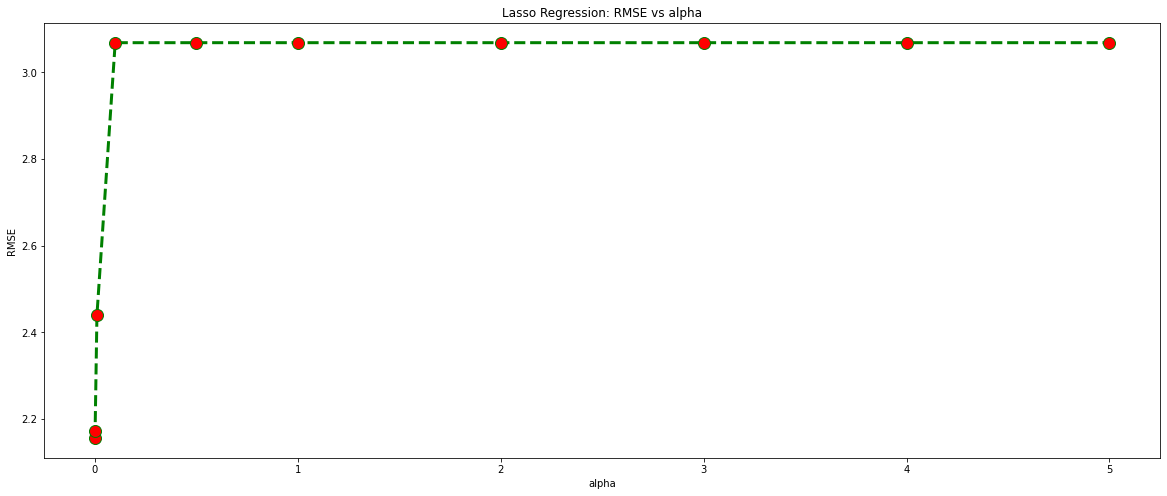

Best value of alpha is 0.0001 That gives error = 2.1565022280067665


In [29]:
alpha_list=[0.0001,0.001,0.01,0.1,0.5,1,2,3,4,5]
rmse_list=[]
plt.figure(figsize=(20, 8))
for i in alpha_list:
    #Performing lasso on each alpha
    lassoReg = Lasso(alpha=i, normalize=True)
    lassoReg.fit(X_train,Y_train)
    pred = lassoReg.predict(X_test)
    rmse= np.sqrt(mean_squared_error(Y_test,pred))
    print('for alpha =',i,'RMSE =',rmse)
    rmse_list.append(rmse)

plt.title('Lasso Regression: RMSE vs alpha')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.plot(alpha_list,rmse_list,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=12)
plt.show()
best_rmse=min(rmse_list)
print("Best value of alpha is",alpha_list[rmse_list.index(best_rmse)],'That gives error =',best_rmse)
best_alpha=alpha_list[rmse_list.index(best_rmse)]
lassocoef1 = Ridge(alpha=best_alpha, normalize=True).fit(X_train,Y_train).coef_
np.savetxt('weightsQ1_2_a_lasso.csv' , lassocoef1 , fmt='%s', delimiter=',')

In [33]:
from sklearn.model_selection import GridSearchCV
alpha_list=[0.0001,0.001,0.01,0.1,0.5,1,2,3,4,5]
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alpha_list))
grid.fit(X_train, Y_train)
# print(grid)
# summarize the results of the grid search
print("According to GridSearch Results, for Ridge Regression-")
print("Best value of alpha =",grid.best_estimator_.alpha)
print("Best score =",grid.best_score_)
best_alpha=grid.best_estimator_.alpha
ridgecoef2 = Ridge(alpha=best_alpha, normalize=True).fit(X_train,Y_train).coef_
np.savetxt('weightsQ1_2_b_ridge.csv' , ridgecoef2 , fmt='%s', delimiter=',')

According to GridSearch Results, for Ridge Regression-
Best value of alpha = 0.5
Best score = 0.5344459301069733


In [36]:
from sklearn.model_selection import GridSearchCV
alpha_list=[0.0001,0.001,0.01,0.1,0.5,1,2,3,4,5]
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alpha_list))
grid.fit(X_train, Y_train)
# print(grid)
# summarize the results of the grid search
print("According to GridSearch Results, for Lasso Regression:")
print("Best value of alpha =",grid.best_estimator_.alpha)
print("Best score =",grid.best_score_)
best_alpha=grid.best_estimator_.alpha
lassocoef2 = Ridge(alpha=best_alpha, normalize=True).fit(X_train,Y_train).coef_
np.savetxt('weightsQ1_2_b_lasso.csv' , lassocoef2 , fmt='%s', delimiter=',')

According to GridSearch Results, for Lasso Regression:
Best value of alpha = 0.001
Best score = 0.5345778428309513


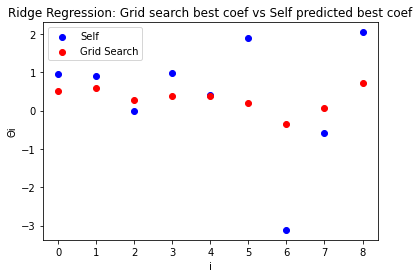

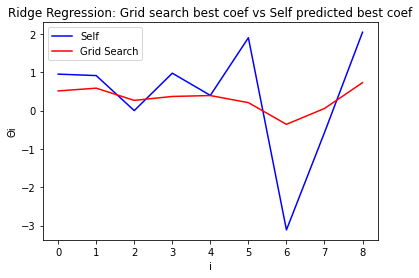

In [37]:
plt.scatter(np.arange(len(ridgecoef1)),ridgecoef1, color='blue', label="Self")
plt.scatter(np.arange(len(ridgecoef2)),ridgecoef2, color='red', label="Grid Search")
plt.title('Ridge Regression: Grid search best coef vs Self predicted best coef')
plt.legend(loc='best')
plt.ylabel('Θi')
plt.xlabel('i')
plt.show()
plt.plot(np.arange(len(ridgecoef1)),ridgecoef1, color='blue', label="Self")
plt.plot(np.arange(len(ridgecoef2)),ridgecoef2, color='red', label="Grid Search")
plt.title('Ridge Regression: Grid search best coef vs Self predicted best coef')
plt.legend(loc='best')
plt.ylabel('Θi')
plt.xlabel('i')
plt.show()

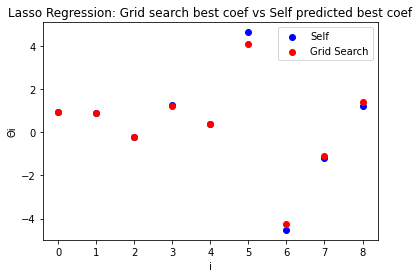

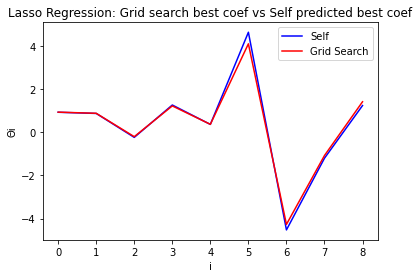

In [38]:
plt.scatter(np.arange(len(lassocoef1)),lassocoef1, color='blue', label="Self")
plt.scatter(np.arange(len(lassocoef2)),lassocoef2, color='red', label="Grid Search")
plt.title('Lasso Regression: Grid search best coef vs Self predicted best coef')
plt.legend(loc='best')
plt.ylabel('Θi')
plt.xlabel('i')
plt.show()
plt.plot(np.arange(len(lassocoef1)),lassocoef1, color='blue', label="Self")
plt.plot(np.arange(len(lassocoef2)),lassocoef2, color='red', label="Grid Search")
plt.title('Lasso Regression: Grid search best coef vs Self predicted best coef')
plt.legend(loc='best')
plt.ylabel('Θi')
plt.xlabel('i')
plt.show()